<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 407 to 55
Data columns (total 30 columns):
radius_mean                398 non-null float64
texture_mean               398 non-null float64
perimeter_mean             398 non-null float64
area_mean                  398 non-null float64
smoothness_mean            398 non-null float64
compactness_mean           398 non-null float64
concavity_mean             398 non-null float64
concave points_mean        398 non-null float64
symmetry_mean              398 non-null float64
fractal_dimension_mean     398 non-null float64
radius_se                  398 non-null float64
texture_se                 398 non-null float64
perimeter_se               398 non-null float64
area_se                    398 non-null float64
smoothness_se              398 non-null float64
compactness_se             398 non-null float64
concavity_se               398 non-null float64
concave points_se          398 non-null float64
symmetry_se                398

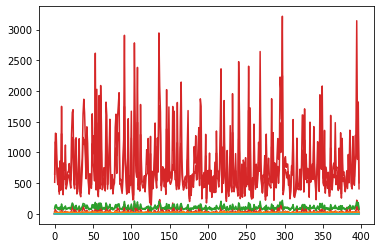

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

data = pd.read_csv("data.csv")
data = pd.read_csv("../autoencoder_Python/data.csv",header=0)
data.drop("Unnamed: 32",axis=1,inplace=True)
data.drop("id",axis=1,inplace=True)


from sklearn.model_selection import train_test_split 
train, test = train_test_split(data, test_size = 0.3)

prediction_var = list(data.columns[1:31])
outcome_var = "diagnosis"

train_X = train[prediction_var]# taking the training data input
train_y = train.diagnosis# This is output of our training data
# same we have to do for test
test_X = test[prediction_var] # taking test data inputs
test_y = test.diagnosis   #output value of test dat

train_X.info()
import matplotlib.pyplot as plt
n_train = np.array(train_X)
n_test = np.array(test_X)

plt.plot(n_train)
plt.show()

30
(398, 30)


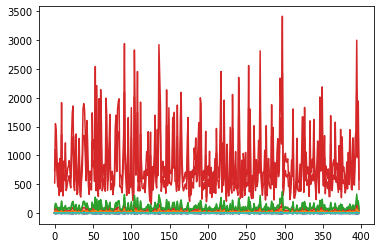

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf

input_dim = n_train.shape[1]
feature_dim = [25, 20, 15, 10]
print(input_dim)
inputs = Input(shape=(input_dim,))
encoded = inputs
encoded = Dense(feature_dim[0], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[1], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[2], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[3], kernel_initializer="uniform")(encoded)

decoded = encoded
decoded = Dense(feature_dim[2], kernel_initializer="uniform")(decoded)
decoded = Dense(feature_dim[1], kernel_initializer="uniform")(decoded)
decoded = Dense(feature_dim[0], kernel_initializer="uniform")(decoded)
decoded = Dense(input_dim, kernel_initializer="uniform")(decoded)


autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')

autoencoder.fit(n_train, n_train,
                verbose=0,
                epochs=150,
                batch_size=100,
                shuffle=True,
                validation_data=(n_test, n_test))

predict_vals = autoencoder.predict(n_train)
print(predict_vals.shape)
plt.plot(predict_vals)
plt.show()

In [5]:
from keras.models import Sequential

featuremodel = Sequential()
featuremodel.add(Dense(feature_dim[0], input_shape=(input_dim,), weights=autoencoder.layers[1].get_weights()))
featuremodel.add(Dense(feature_dim[1], weights=autoencoder.layers[2].get_weights()))
featuremodel.add(Dense(feature_dim[2], weights=autoencoder.layers[3].get_weights()))
featuremodel.add(Dense(feature_dim[3], weights=autoencoder.layers[4].get_weights()))

featuremodel.compile(optimizer='adadelta', loss='mse')

from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

# classic svm
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print("Accuracy svm: %s" % "{0:.3%}".format(metrics.accuracy_score(prediction, test_y)))

Accuracy svm: 64.327%


C:\Users\Subhankar Chattoraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
